In [1]:
import numpy as np

In [2]:
x = np.random.normal(loc = 0.0, scale = 1.0, size = 500*4).reshape(4,500)
y = np.linspace(-10, 10, 500, endpoint = False)

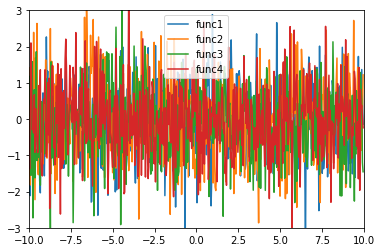

In [3]:
for i in range(4):
    plot(y,x[i])
ylim(-3,3)
xlim(-10,10)
legend(["func1", "func2", "func3", "func4"])

In [4]:
mu = np.zeros(500)
sigma = np.diag([1.]*500)
sigma += np.diag([-0.5]*499, 1) + np.diag([-0.5]*499, -1)
L = np.linalg.cholesky(sigma)

In [5]:
s = np.dot(np.random.randn(4, 500), L) + mu

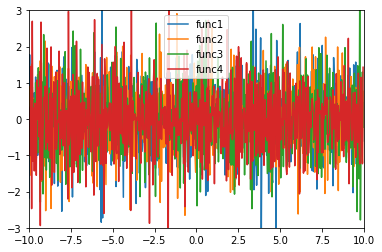

In [6]:
for i in range(4):
    plot(y,s[i])
ylim(-3,3)
xlim(-10,10)
legend(["func1", "func2", "func3", "func4"])

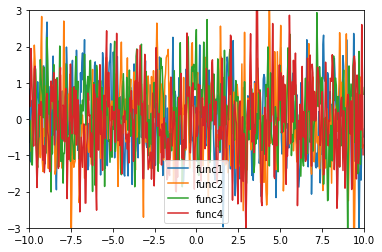

In [7]:
mu = np.zeros(500)
sigma = np.diag([1.]*500)
sigma += np.diag([0.5]*499, 1) + np.diag([0.5]*499, -1)
L = np.linalg.cholesky(sigma)
s = np.dot(np.random.randn(4, 500), L) + mu
for i in range(4):
    plot(y,s[i])
ylim(-3,3)
xlim(-10,10)
legend(["func1", "func2", "func3", "func4"])

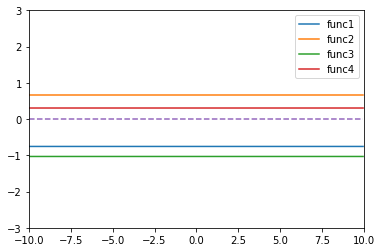

In [8]:
mu = np.zeros(500)
sigma = np.ones((500,500))
s = np.random.multivariate_normal(mu,sigma,500)
for i in range(4):
    plot(y,s[i])
ylim(-3,3)
xlim(-10,10)
legend(["func1", "func2", "func3", "func4"])
plot(y, [0]*500, '--')

In [9]:
u,s,v = np.linalg.svd(sigma)
np.linalg.matrix_rank(sigma)

1

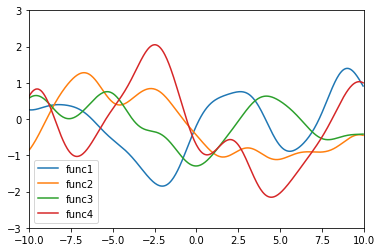

In [10]:
h = 5
y = y.reshape(-1,1)
y1 = np.exp(-y**2/h)
mu = np.zeros(500)
sigma = (y1 @ y1.T) * np.exp(2 * y @ y.T /h)
nicekernel = sigma
s = np.random.multivariate_normal(mu,sigma,500)
for i in range(4):
    plot(y,s[i])
ylim(-3,3)
xlim(-10,10)
legend(["func1", "func2", "func3", "func4"])

In [11]:
b = np.random.randn(500)
b[-1] = 1000000
u,s,v = np.linalg.svd(sigma)
a = u @ np.diag(np.sqrt(s)) @ b

In [12]:
L = u@np.diag(np.sqrt(s))

(0, 49)

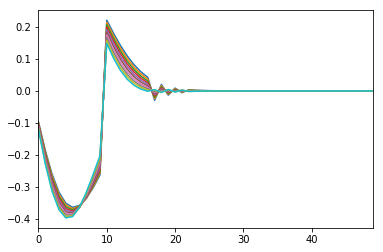

In [13]:
for i in range(10):
    plot(L[i][:50])
xlim(0,49)

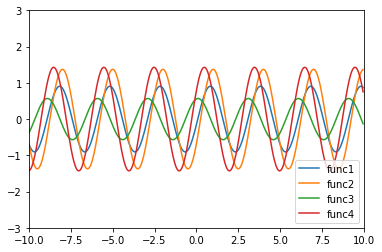

In [14]:
sigma = np.empty((500,500))
for i in range(500):
    for j in range(500):
        sigma[i][j] = np.cos(np.pi*(y[i] - y[j])/1.5)
mu = np.zeros(500)
np.random.seed(20)
rfunc = np.random.multivariate_normal(mu,sigma,4)
for i in range(4):
    plot(y, rfunc[i])
xlim(-10,10)
ylim(-3,3)
legend(["func1", "func2", "func3", "func4"])

In [15]:
np.linalg.matrix_rank(sigma)

2

In [16]:
x_t = np.array([-6, 0, 7])
x_t = x_t[:, None]
x = np.linspace(-10,10,500)
x = x[:,None]
x = np.vstack([x, x_t])
f_m = np.array([3,-2,2])
f_m = f_m[:,None]
xtmp = np.exp(-x**2/h)
sigma = (xtmp@xtmp.T) * np.exp(2*x @ x.T/h)
n = 500
mu_post = sigma[:n,n:] @ np.linalg.inv(sigma[n:,n:]) @ f_m
sigma_post = sigma[:n,:n] - sigma[:n, n:]@np.linalg.inv(sigma[n:,n:])@sigma[n:, :n]
rnd = np.random.multivariate_normal(mu_post.T[0],sigma_post,4)

In [17]:
u, s, v = np.linalg.svd(sigma)

Text(7,2,'(7,2)')

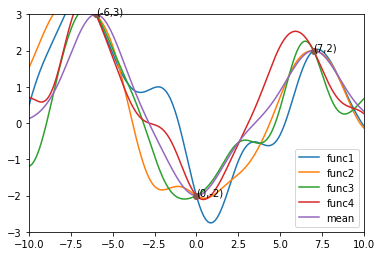

In [18]:
for i in range(4):
    plot(x[:n], rnd[i])
plot(x[:n],mu_post)
legend(["func1", "func2", "func3", "func4", "mean"])
plot(x_t, f_m, "o")
xlim(-10,10)
ylim(-3,3)
annotate("(-6,3)",(x_t[0], f_m[0]))
annotate("(0,-2)",(x_t[1], f_m[1]))
annotate("(7,2)",(x_t[2], f_m[2]))



[]

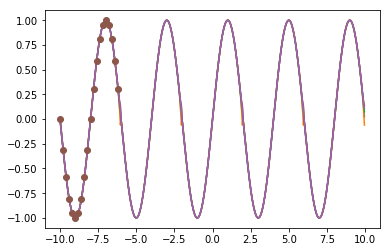

In [20]:
# example 1
x = np.linspace(-10,10,500, endpoint =False)
x = x[:,None]
x_t = np.squeeze(x[0:100:5])

f_m = np.sin(np.pi/2*x_t)
f_m = f_m[:,None]

vect = u.T[:100,:]
sigma = np.tile(nicekernel[slice(0,500,5),slice(0,500,5)],(5,5))

target = np.squeeze(np.where(x==x_t))[0]
inter = sigma[np.ix_(target, target)]
targetrow = sigma[target,:]
targetcol = sigma[:,target]

sigma = np.c_[sigma, targetcol]
sigma = np.r_[sigma, np.c_[targetrow, inter]]

n = 500
mu_post = sigma[:n,n:] @ np.linalg.pinv(sigma[n:,n:]) @ f_m

sigma_post = sigma[:n,:n] - sigma[:n, n:]@np.linalg.pinv(sigma[n:,n:])@sigma[n:, :n]
rnd = np.random.multivariate_normal(mu_post.T[0], sigma_post, 4)

for i in range(4):
    plt.plot(x, rnd[i])
np.linalg.matrix_rank(np.linalg.pinv(sigma[n:,n:]))
plt.plot(x, mu_post)
plt.plot(x_t, f_m,'o')
plt.plot()

[]

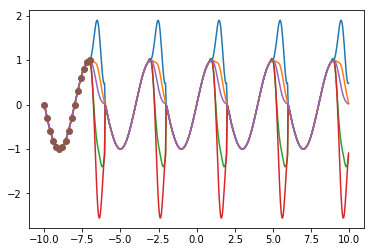

In [21]:
# example 1
x = np.linspace(-10,10,500, endpoint =False)
x = x[:,None]
x_t = np.squeeze(x[0:80:5])

f_m = np.sin(np.pi/2*x_t)
f_m = f_m[:,None]

vect = u.T[:100,:]
sigma = np.tile(nicekernel[slice(0,500,5),slice(0,500,5)],(5,5))

target = np.squeeze(np.where(x==x_t))[0]
inter = sigma[np.ix_(target, target)]
targetrow = sigma[target,:]
targetcol = sigma[:,target]

sigma = np.c_[sigma, targetcol]
sigma = np.r_[sigma, np.c_[targetrow, inter]]

n = 500
mu_post = sigma[:n,n:] @ np.linalg.pinv(sigma[n:,n:]) @ f_m

sigma_post = sigma[:n,:n] - sigma[:n, n:]@np.linalg.pinv(sigma[n:,n:])@sigma[n:, :n]
rnd = np.random.multivariate_normal(mu_post.T[0], sigma_post, 4)

for i in range(4):
    plt.plot(x, rnd[i])
np.linalg.matrix_rank(np.linalg.pinv(sigma[n:,n:]))
plt.plot(x, mu_post)
plt.plot(x_t, f_m,'o')
plt.plot()